In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler


In [2]:
# Carregar a base Covertype, porém limitando o tamanho para reduzir tempo de execução
X, y = fetch_covtype(return_X_y=True)
X = X[:10000]
y = y[:10000]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados StandartScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Definir os modelos de classificação
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
knn = KNeighborsClassifier()
mlp = MLPClassifier(random_state=42)

In [4]:
# Definir espaços de busca de hiperparâmetros

param_distributions_dt = {
    'max_depth': [1, 2, 4, 5, 10, 15, 20, 25, 30, 35, 45, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_distributions_svm = {
    'C': [0.01,0.1,1,2,4,5,10],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['sigmoid', 'rbf']
}

param_distributions_knn = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100],
    'weights': ['uniform', 'distance']
}

param_distributions_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 400],
    'activation': ['relu','logistic', 'tanh']
}

In [5]:
# Número de rodadas de busca
n_runs = 10

best_scores_dt = []
best_scores_svm = []
best_scores_knn = []
best_scores_mlp = []

## Decision Tree

In [6]:
for i in range(n_runs):
    # Decision Tree
    search_dt = RandomizedSearchCV(
        estimator=dt,
        param_distributions=param_distributions_dt,
        n_iter=5,
        cv=3,
        random_state=42+i,
        n_jobs=-1
    )
    search_dt.fit(X_train, y_train)
    y_pred_dt = search_dt.best_estimator_.predict(X_test)
    best_scores_dt.append(accuracy_score(y_test, y_pred_dt))

print(search_dt.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 35, 'criterion': 'entropy'}


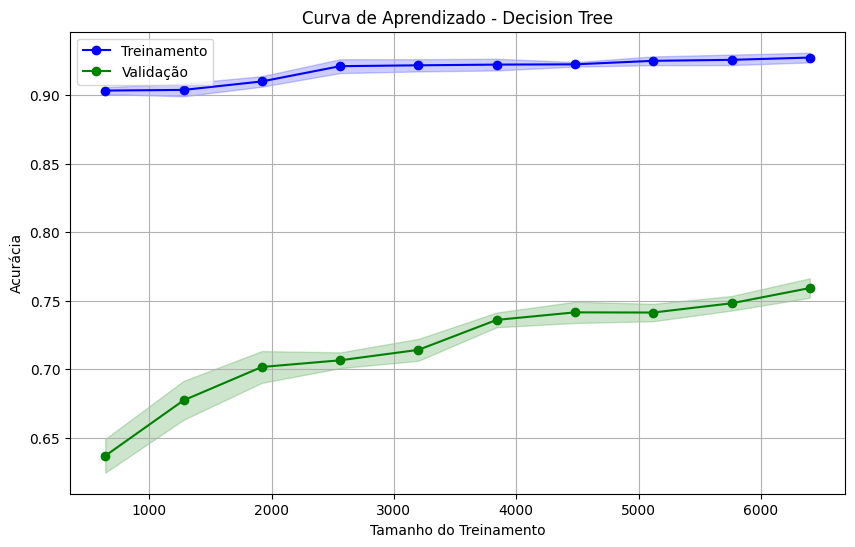

In [7]:
# Modelo baseado nos melhores hiperparâmetros
dt = DecisionTreeClassifier(**search_dt.best_params_, random_state=42)

# Gerar a curva de aprendizado
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy', n_jobs=-1
)

# Calcular médias e desvios padrão
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validação")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Curva de Aprendizado - Decision Tree")
plt.xlabel("Tamanho do Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.grid()
plt.show()

## KNN

In [8]:
for i in range(n_runs):
    # KNN
    search_knn = RandomizedSearchCV(
        estimator=knn,
        param_distributions=param_distributions_knn,
        n_iter=5,
        cv=3,
        random_state=42+i,
        n_jobs=-1
    )
    search_knn.fit(X_train, y_train)
    y_pred_knn = search_knn.best_estimator_.predict(X_test)
    best_scores_knn.append(accuracy_score(y_test, y_pred_knn))

# printa a melhor confirguração do KNN 
print(search_knn.best_params_)


{'weights': 'distance', 'n_neighbors': 5}


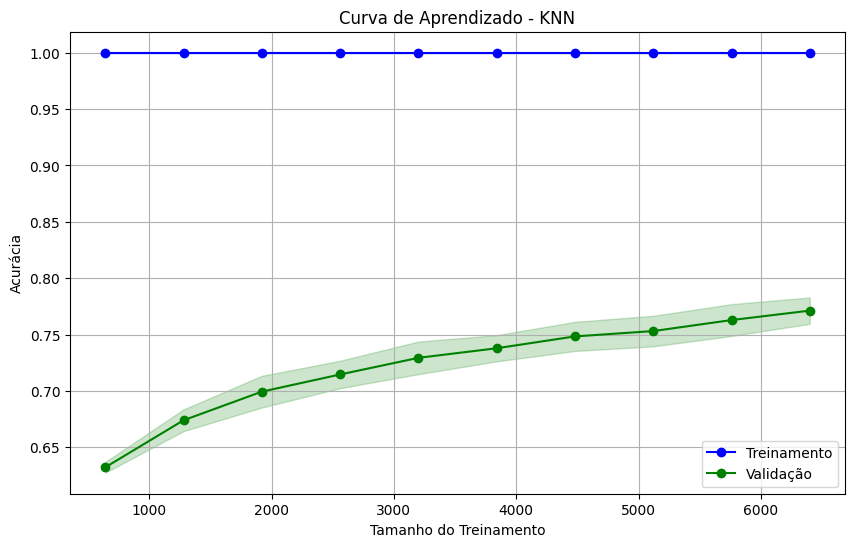

In [9]:
# Modelo baseado nos melhores hiperparâmetros
knn = KNeighborsClassifier(**search_knn.best_params_)

# Gerar a curva de aprendizado
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy', n_jobs=-1
)

# Calcular médias e desvios padrão
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validação")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Curva de Aprendizado - KNN")
plt.xlabel("Tamanho do Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.grid()
plt.show()

## MLP

In [10]:
for i in range(n_runs):
    # MLP
    search_mlp = RandomizedSearchCV(
        estimator=mlp,
        param_distributions=param_distributions_mlp,
        n_iter=5,
        cv=3,
        random_state=42+i,
        n_jobs=-1
    )
    search_mlp.fit(X_train, y_train)
    y_pred_mlp = search_mlp.best_estimator_.predict(X_test)
    best_scores_mlp.append(accuracy_score(y_test, y_pred_mlp))

print(search_mlp.best_params_)

c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the opti

{'max_iter': 400, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'tanh'}


c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


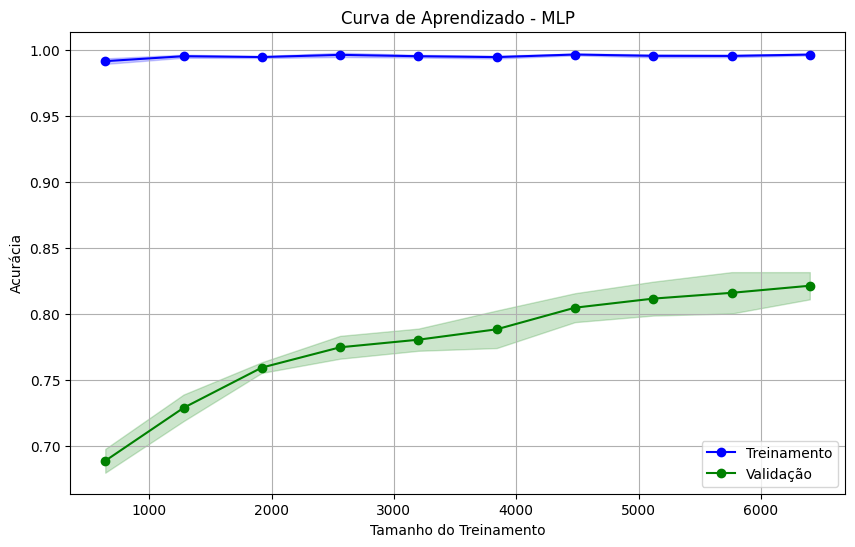

In [11]:
# Modelo baseado nos melhores hiperparâmetros
mlp = MLPClassifier(**search_mlp.best_params_)

# Gerar a curva de aprendizado
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
    mlp, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy', n_jobs=-1
)

# Calcular médias e desvios padrão
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validação")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Curva de Aprendizado - MLP")
plt.xlabel("Tamanho do Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.grid()
plt.show()

## SVM

In [12]:
for i in range(n_runs):
    # SVM
    search_svm = RandomizedSearchCV(
        estimator=svm,
        param_distributions=param_distributions_svm,
        n_iter=5,
        cv=3,
        random_state=42+i,
        n_jobs=-1
    )
    search_svm.fit(X_train, y_train)
    y_pred_svm = search_svm.best_estimator_.predict(X_test)
    best_scores_svm.append(accuracy_score(y_test, y_pred_svm))

print(search_svm.best_params_)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 4}


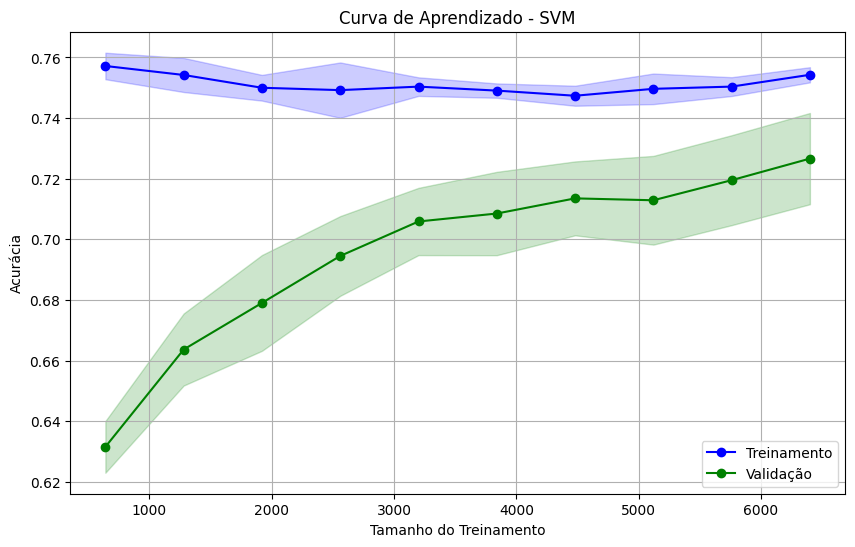

In [15]:
# Modelo baseado nos melhores hiperparâmetros
svm = SVC(**search_svm.best_params_)

# Gerar a curva de aprendizado
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
    svm, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy', n_jobs=-1
)

# Calcular médias e desvios padrão
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validação")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Curva de Aprendizado - SVM")
plt.xlabel("Tamanho do Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.grid()
plt.show()

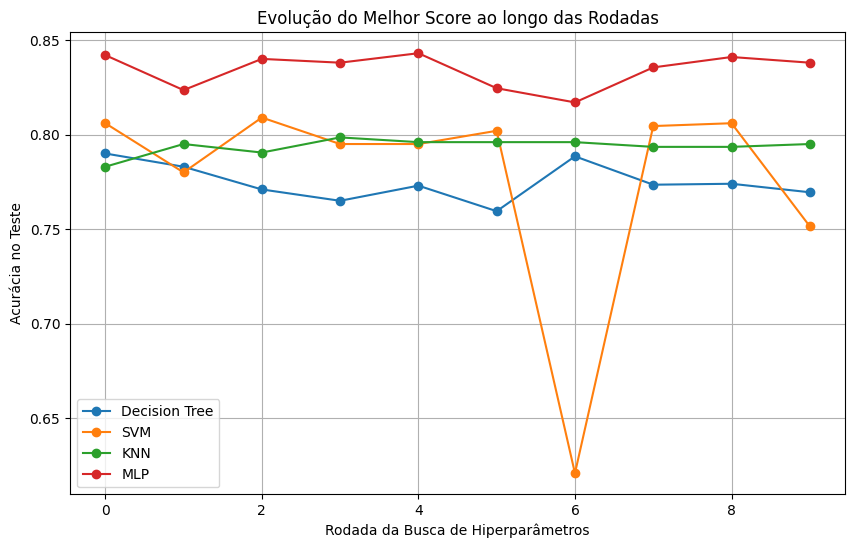

In [16]:
# Plotar a evolução do score
plt.figure(figsize=(10,6))
plt.plot(best_scores_dt, marker='o', label='Decision Tree')
plt.plot(best_scores_svm, marker='o', label='SVM')
plt.plot(best_scores_knn, marker='o', label='KNN')
plt.plot(best_scores_mlp, marker='o', label='MLP')
plt.xlabel('Rodada da Busca de Hiperparâmetros')
plt.ylabel('Acurácia no Teste')
plt.title('Evolução do Melhor Score ao longo das Rodadas')
plt.legend()
plt.grid(True)
plt.show()